

# Logistic Regression

Should be called LinearClassification

Logistic regression, despite its name, is a linear model for classification rather than regression

Machine Learning method for Categorical classification of data

Ex:
We want to determine if the image is of a human or an animal

True of False, 1 or 0, Yes or No

Categorical Prediction, A,B,C or D

###### Pros

LogisticRegression is simple to implement.

Less complexity compared to other algorithms.

###### Cons

Assumes linearity between the dependent variable and the independent variables.

Requires No multicollinearity between independent variables.

Not recommended for practical use-cases.

Today we are going to spend a lot of time on Exploring the data and then Cleaning the data


### Getting Started

`from sklearn.linear_model import LogisticRegression # The model we are going to use`

`from sklearn.model_selection import train_test_split # split the data`

`from sklearn.metrics import confusion_matrix, classification_report # Evaluate the results`

Create the Data Frame from all the labeled data with the target as well, ex Historical data

Dataset (Titanic)
https://www.kaggle.com/datasets/brendan45774/test-file

`df = pd.read_csv(...)` 

### Explore the data

What is our target?

`sns.countplot(x='Survived', data=df)`

How does the target relate to other columns?

`sns.countplot(x='Survived', hue='Pclass', data=df)`

`sns.countplot(x='Survived', hue='Embarked', data=df)`

`sns.countplot(x='Survived', hue='Sex', data=df)`

Are there any Nan values?

`sns.heatmap(df.isna())`



### Cleaning and Preparing the Data

###### Clean up `Nan` Data
1. Remove it
2. Fill in with average
3. Fill in with a known value

###### Multi-Collinearity
Multi-Collinearity is when we have categorical columns already in our data set, that would be too linear to the target 

We need to split the column into a column for each category  
but there is still a problem

The broken up columns are still correlated to themselves and therefore are still linearly related to the target

We need to remove one of the categorical columns to then skew the linearity of the categorical columns

We do this by splitting each category in a column into their own column and dropping one of the columns.

For each column that is a category

`
col = pd.get_dummies(df['column_with_categorical_data'], drop_first=True)
pd.concat([df, col], axis=1)
`

###### Split the Data into Attributes and Targets

`
X = df[['column_names']]
y = df['target_column']
`

### Train Test and Split

`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=42)
model = Model()
model.fit(X_train, y_train)
`


### Evaluating
	
We can use built in classification tools such as the confusion matrix or classification matrix to validate the results

This is run between the prediction set and y_test

`from sklearn.metrics import classification_report, confusion_matrix`

`y_pred = model.predict(X_test)`

`confusion_matrix(y_test, y_pred)`
`classification_report(y_test, y_pred)`



###### Confusion Matrix


<div>
<br>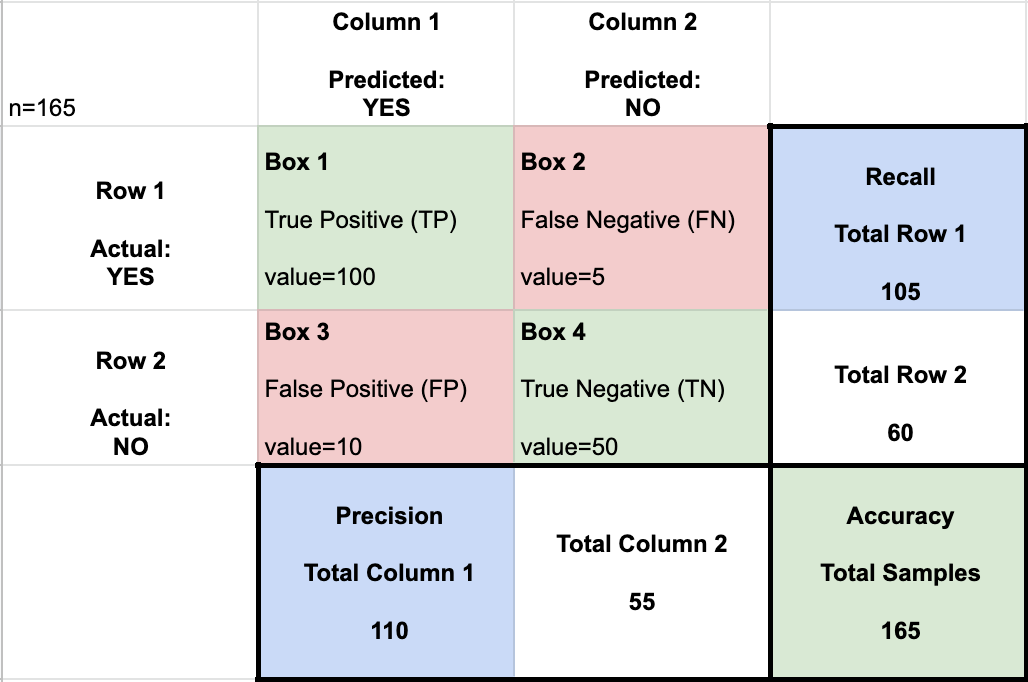
</div>

###### Classification Report
Accuracy
- All the True predictions over the total number of samples
- (TP + TN) / Total Samples
- (Box 1 + Box4) / (Box 1 + Box 2 + Box 3 + Box 4)
							
Precision
- True Predictions divided by the total PREDICTED yes
- TP / (TP + FP) 
- Box 1 / (Box 1 + Box 3)
							
Recall 
- True Predictions divided by the total ACTUAL yes
- TP / (TP + FN) 
- Box 1 / (Box 1 + Box 2)							
							
F1-Score
- Measure of the accuracy of the test
- (2 * TP) / (2 * TP + FP + FN)
- (2 * Box 1) / (2 * Box 1 + Box 2 + Box 3)							


###### Why do we need this level of Scrutiny?

99 humans and a single animal example - Machine Learning predicted the 99 humans correctly but guessed the animal was a human incorrectly...all metrics say the model is 99% accurate...When in fact the model is innacurate

For classification problems (guideline, not fact):
- 70 - 80% is considered okay but can be improved up (possibly underfit)
- 80 - 90% is considered good and maybe even the sweet spot (balanced)
- 90 - 100% is great but also questionable (possible overfitting)
- Depending on the dataset 95% or greater could be a sign of overfitting

In [1]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
# Import data from the titanic data set


df = pd.read_csv('Titanic.csv')


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


/Users/roadblock/coding/coding101/data_sciences/venv_data_sciences/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

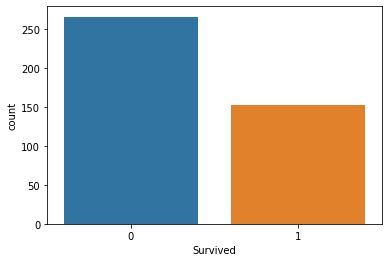

In [4]:
sns.countplot(df['Survived'])

In [5]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

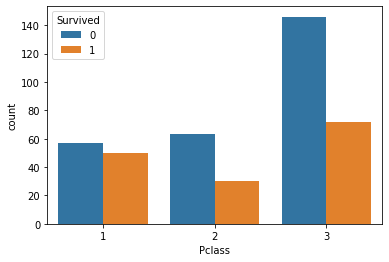

In [6]:
sns.countplot(x='Pclass', hue='Survived', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

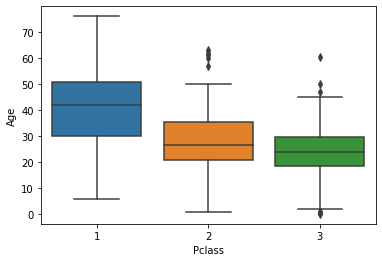

In [19]:
sns.boxplot(x=df['Pclass'], y=df['Age'])

In [20]:
df[df['Pclass'] == 1]['Age'].mean()

40.91836734693877

In [21]:
df[df['Pclass'] == 2]['Age'].mean()

28.7775

In [22]:
df[df['Pclass'] == 3]['Age'].mean()

24.02794520547945

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

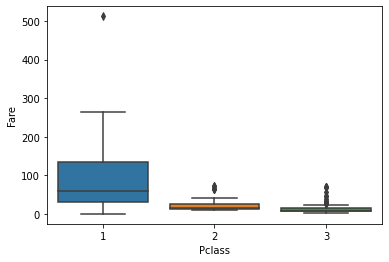

In [23]:
sns.boxplot(x=df['Pclass'], y=df['Fare'])

In [24]:
df[df['Fare'] > 300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
343,1235,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C


In [30]:
df[(df['Pclass'] == 1) & (df['Fare'] > 200)][['Cabin','Fare','Pclass']].head(70)

,Cabin,Fare,Pclass
24,B57 B59 B63 B66,262.3750,1
53,C23 C25 C27,263.0000,1
59,B61,262.3750,1
64,B57 B59 B63 B66,262.3750,1
69,C23 C25 C27,263.0000,1
74,C130,211.5000,1
75,C132,211.5000,1
81,C55 C57,221.7792,1
114,C55 C57,221.7792,1
142,B57 B59 B63 B66,262.3750,1


In [32]:
262 / 4 * 3

196.5

/Users/roadblock/coding/coding101/data_sciences/venv_data_sciences/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

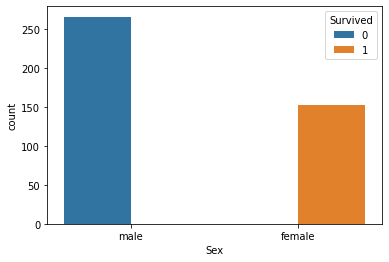

In [40]:
# We'll take a look at this again but this will cause a problem
# because there is a direct LINEAR relationship between Sex and Survived

sns.countplot(df['Sex'], hue=df['Survived'])

In [36]:
df['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [39]:
df[df['Survived'] == 1]['Sex'].value_counts()

female    152
Name: Sex, dtype: int64

In [41]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

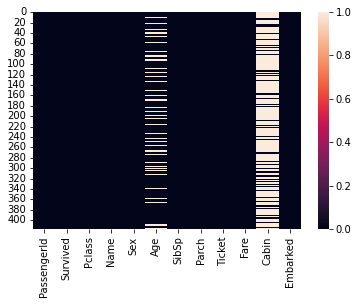

In [47]:
sns.heatmap(df.isnull())

In [48]:
df.shape

(418, 12)

In [53]:
# Get the row where the dataframe is missing

df[df['Fare'].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [54]:
# Average fare for the 3rd class

df[df['Pclass'] == 3]['Fare'].mean()



12.459677880184334

In [55]:
df['Fare'].loc[152] = 12.46

/var/folders/l_/qm4dplj969j0tcpycqgttbwc0000gn/T/ipykernel_12161/3574702278.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'].loc[152] = 12.46


In [56]:
df[df['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [57]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [58]:
# We are going to get rid of the Cabin Column altogether

df = df.drop('Cabin', axis=1)


In [59]:
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64

In [76]:
# Filled in the missing ages

def fill_in_age(columns):
#     print(columns[0], columns[1])
    age = columns[0]
    pclass = columns[1]
    
    if np.isnan(age):
        if pclass == 1:
            return 41
        elif pclass == 2:
            return 29
        else:
            return 24
    else:
        return age
    
    
df['Age'] = df[['Age', 'Pclass']].apply(fill_in_age, axis=1)

In [77]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Filled_Age
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,34.5
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,47.0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,62.0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,27.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,22.0


In [78]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Filled_Age     0
dtype: int64

In [82]:
# We still have a linearity problem - meaning
# We have categories other than the outcome

# Pclass, Embarked, Sex
# We have to solve for this problem as well
# We use dummies for this, OneHotEncoding



dummies = pd.get_dummies(df[['Embarked', 'Sex']], drop_first=True)
df = pd.concat([df, dummies], axis=1)









In [83]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Filled_Age,Embarked_Q,Embarked_S,Sex_male
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,34.5,1,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,47.0,0,1,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,62.0,1,0,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,27.0,0,1,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,22.0,0,1,0


In [88]:
df = pd.concat([df, pd.get_dummies(df['Pclass'], drop_first=True).rename({2:'P2', 3:'P3'}, axis=1)], axis=1)

In [89]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Filled_Age,Embarked_Q,Embarked_S,Sex_male,P2,P3
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,34.5,1,0,1,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,47.0,0,1,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,62.0,1,0,1,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,27.0,0,1,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,22.0,0,1,0,0,1


In [90]:
# Now we can start to drop the unnecessary columns

df.columns



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Filled_Age', 'Embarked_Q',
       'Embarked_S', 'Sex_male', 'P2', 'P3'],
      dtype='object')

In [92]:
df = df.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'Ticket', 'Embarked', 'Filled_Age',], axis=1)

In [91]:
df['Ticket'].value_counts()

PC 17608    5
CA. 2343    4
113503      4
PC 17483    3
220845      3
           ..
349226      1
2621        1
4133        1
113780      1
2668        1
Name: Ticket, Length: 363, dtype: int64

In [93]:
df.head()

,Survived,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male,P2,P3
0,0,34.5,0,0,7.8292,1,0,1,0,1
1,1,47.0,1,0,7.0000,0,1,0,0,1
2,0,62.0,0,0,9.6875,1,0,1,1,0
3,0,27.0,0,0,8.6625,0,1,1,0,1
4,1,22.0,1,1,12.2875,0,1,0,0,1


In [94]:
df.isnull().sum()

Survived      0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
Sex_male      0
P2            0
P3            0
dtype: int64

In [95]:
# Now we can start our Logistic Regression Model Train Test Split process


X = df[df.columns[1:]]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)




In [99]:
# Model instantiation

model = LogisticRegression(max_iter=1500)
model.fit(X_train, y_train)
predictions = model.predict(X_test)



In [100]:
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [102]:
y_test.values

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [106]:

conf_mat = confusion_matrix(y_test, predictions)
print(conf_mat)

[[85  0]
 [ 0 41]]


In [104]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [115]:
# The above calculates everything from the confusion matrix for us

box1 = conf_mat[0][0]
box2 = conf_mat[0][1]
box3 = conf_mat[1][0]
box4 = conf_mat[1][1]

print(box1, box2, box3, box4)


print('Accuracy', (box1 + box4) / (box1 + box2 + box3 + box4))
# Positives

print('\nPrecision', box1 / (box1 + box3))
print('Recall', box1 / (box1 + box2))
print('F1-Score', (2 * box1) / (2 * box1 + box2 + box3))


# Negatives

print('\nPrecision', box4 / (box4 + box2))
print('Recall', box4 / (box4 + box3))
print('F1-Score', (2 * box4) / (2 * box4 + box2 + box3))




85 0 0 41
Accuracy 1.0

Precision 1.0
Recall 1.0
F1-Score 1.0

Precision 1.0
Recall 1.0
F1-Score 1.0


In [116]:
# Let's drop the sex_male column and run this again

df.columns



Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S',
       'Sex_male', 'P2', 'P3'],
      dtype='object')

In [117]:
X = df[['Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'P2', 'P3']]
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



In [118]:
model = LogisticRegression(max_iter=1500)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


In [119]:
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [121]:
y_test.values

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [122]:
conf_mat = confusion_matrix(y_test, predictions)
print(conf_mat)

[[72 13]
 [30 11]]


In [123]:
box1 = conf_mat[0][0]
box2 = conf_mat[0][1]
box3 = conf_mat[1][0]
box4 = conf_mat[1][1]

print(box1, box2, box3, box4)


print('Accuracy', (box1 + box4) / (box1 + box2 + box3 + box4))
# Positives

print('\nPrecision', box1 / (box1 + box3))
print('Recall', box1 / (box1 + box2))
print('F1-Score', (2 * box1) / (2 * box1 + box2 + box3))


# Negatives

print('\nPrecision', box4 / (box4 + box2))
print('Recall', box4 / (box4 + box3))
print('F1-Score', (2 * box4) / (2 * box4 + box2 + box3))



72 13 30 11
Accuracy 0.6587301587301587

Precision 0.7058823529411765
Recall 0.8470588235294118
F1-Score 0.7700534759358288

Precision 0.4583333333333333
Recall 0.2682926829268293
F1-Score 0.3384615384615385


In [124]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.85      0.77        85
           1       0.46      0.27      0.34        41

    accuracy                           0.66       126
   macro avg       0.58      0.56      0.55       126
weighted avg       0.63      0.66      0.63       126

